In [1]:
try:
    import tensorflow as tf
    from tensorflow.python import keras
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    %matplotlib inline
    from sklearn.ensemble import VotingClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.svm import SVC
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import confusion_matrix,classification_report
    from keras.models import Sequential
    from keras.layers import Dense
    from sklearn.preprocessing import LabelEncoder
    print('Library Loaded .........')
except:
    print('One or More Library was not Found ! ')

Library Loaded .........


In [2]:
df = pd.read_csv("career_pred.csv")

In [3]:
df.head()

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,...,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,69,63,78,87,94,94,87,84,61,9,...,Prayer books,salary,no,stubborn,Management,salary,hard worker,yes,no,Database Developer
1,78,62,73,60,71,70,73,84,91,12,...,Childrens,salary,yes,gentle,Technical,salary,hard worker,no,yes,Portal Administrator
2,71,86,91,87,61,81,72,72,94,11,...,Travel,Work,no,stubborn,Management,work,hard worker,no,yes,Portal Administrator
3,76,87,60,84,89,73,62,88,69,7,...,Romance,Work,yes,gentle,Management,work,smart worker,yes,yes,Systems Security Administrator
4,92,62,90,67,71,89,73,71,73,4,...,Cookbooks,salary,no,stubborn,Management,work,hard worker,yes,yes,Business Systems Analyst


In [4]:
df.shape

(20000, 39)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 39 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Acedamic percentage in Operating Systems  20000 non-null  int64 
 1   percentage in Algorithms                  20000 non-null  int64 
 2   Percentage in Programming Concepts        20000 non-null  int64 
 3   Percentage in Software Engineering        20000 non-null  int64 
 4   Percentage in Computer Networks           20000 non-null  int64 
 5   Percentage in Electronics Subjects        20000 non-null  int64 
 6   Percentage in Computer Architecture       20000 non-null  int64 
 7   Percentage in Mathematics                 20000 non-null  int64 
 8   Percentage in Communication skills        20000 non-null  int64 
 9   Hours working per day                     20000 non-null  int64 
 10  Logical quotient rating                   2000

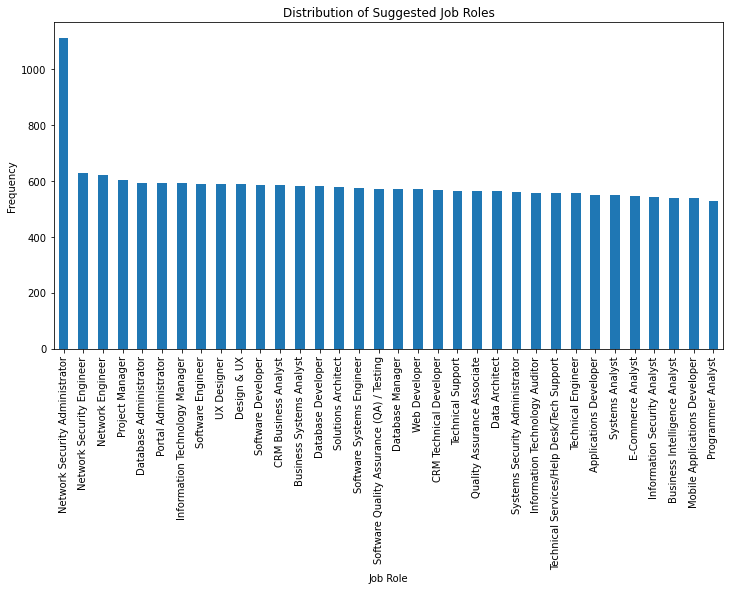

In [6]:
# pd.unique(df["Suggested Job Role"])
# Plot the distribution of the 'Suggested Job Role' column
plt.figure(figsize=(12, 6))
df['Suggested Job Role'].value_counts().plot(kind='bar')
plt.title('Distribution of Suggested Job Roles')
plt.xlabel('Job Role')
plt.ylabel('Frequency')
plt.show()

In [7]:
null_values = df.isnull().sum()
print(null_values)

Acedamic percentage in Operating Systems    0
percentage in Algorithms                    0
Percentage in Programming Concepts          0
Percentage in Software Engineering          0
Percentage in Computer Networks             0
Percentage in Electronics Subjects          0
Percentage in Computer Architecture         0
Percentage in Mathematics                   0
Percentage in Communication skills          0
Hours working per day                       0
Logical quotient rating                     0
hackathons                                  0
coding skills rating                        0
public speaking points                      0
can work long time before system?           0
self-learning capability?                   0
Extra-courses did                           0
certifications                              0
workshops                                   0
talenttests taken?                          0
olympiads                                   0
reading and writing skills        

In [8]:
for column in df.columns:
    unique_elements = df[column].unique()
    print(f"Unique elements in '{column}':")
    print(unique_elements)
    print("\n")

Unique elements in 'Acedamic percentage in Operating Systems':
[69 78 71 76 92 88 93 84 73 62 63 68 90 94 60 82 67 65 74 75 83 89 80 70
 66 85 61 81 79 86 64 91 72 77 87]


Unique elements in 'percentage in Algorithms':
[63 62 86 87 77 72 66 76 80 64 93 83 71 92 91 73 61 89 67 74 82 60 68 88
 70 85 81 78 84 69 94 75 65 79 90]


Unique elements in 'Percentage in Programming Concepts':
[78 73 91 60 90 62 69 88 66 85 70 81 61 77 63 94 68 76 75 93 64 65 84 72
 80 86 74 83 67 79 71 87 92 82 89]


Unique elements in 'Percentage in Software Engineering':
[87 60 84 67 79 62 81 91 83 90 71 74 63 86 70 75 92 93 72 78 85 64 82 65
 69 94 73 66 80 68 61 88 77 76 89]


Unique elements in 'Percentage in Computer Networks':
[94 71 61 89 93 90 66 81 82 70 77 65 62 64 78 63 67 86 69 92 84 85 87 68
 83 60 88 74 75 80 91 72 76 73 79]


Unique elements in 'Percentage in Electronics Subjects':
[94 70 81 73 89 84 93 63 69 82 72 67 65 61 88 91 74 90 80 79 75 62 76 77
 83 92 60 71 68 66 87 64 86 85 78]


Uniqu

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Acedamic percentage in Operating Systems,20000.0,77.00230,10.085697,60.0,68.0,77.0,86.0,94.0
percentage in Algorithms,20000.0,76.94820,10.101733,60.0,68.0,77.0,86.0,94.0
Percentage in Programming Concepts,20000.0,77.01755,10.134815,60.0,68.0,77.0,86.0,94.0
Percentage in Software Engineering,20000.0,77.09450,10.087837,60.0,68.0,77.0,86.0,94.0
Percentage in Computer Networks,20000.0,76.95820,10.020088,60.0,68.0,77.0,85.0,94.0
Percentage in Electronics Subjects,20000.0,77.01555,10.168888,60.0,68.0,77.0,86.0,94.0
Percentage in Computer Architecture,20000.0,77.06985,10.069059,60.0,68.0,77.0,86.0,94.0
Percentage in Mathematics,20000.0,76.91310,10.138555,60.0,68.0,77.0,86.0,94.0
Percentage in Communication skills,20000.0,76.92145,10.103494,60.0,68.0,77.0,86.0,94.0
Hours working per day,20000.0,7.98595,2.593798,4.0,6.0,8.0,10.0,12.0


In [10]:
object_columns = df.select_dtypes(include=['object'])

for column in object_columns.columns:
    print(f"Description of '{column}':")
    print(object_columns[column].describe())
    print("\n")

Description of 'can work long time before system?':
count     20000
unique        2
top         yes
freq      10020
Name: can work long time before system?, dtype: object


Description of 'self-learning capability?':
count     20000
unique        2
top         yes
freq      10102
Name: self-learning capability?, dtype: object


Description of 'Extra-courses did':
count     20000
unique        2
top          no
freq      10049
Name: Extra-courses did, dtype: object


Description of 'certifications':
count             20000
unique                9
top       r programming
freq               2275
Name: certifications, dtype: object


Description of 'workshops':
count                20000
unique                   8
top       web technologies
freq                  2586
Name: workshops, dtype: object


Description of 'talenttests taken?':
count     20000
unique        2
top         yes
freq      10047
Name: talenttests taken?, dtype: object


Description of 'olympiads':
count     20000
unique

In [11]:
# List of columns to be label encoded
columns_to_encode = [
    'can work long time before system?', 'self-learning capability?', 'Extra-courses did',
    'talenttests taken?', 'olympiads', 'In a Realtionship?', 'Gentle or Tuff behaviour?',
    'Management or Technical', 'Salary/work', 'hard/smart worker', 'worked in teams ever?', 'Introvert'
]

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the specified columns
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

# Display the first few rows to verify the changes
df.head()

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,...,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,69,63,78,87,94,94,87,84,61,9,...,Prayer books,salary,0,1,0,0,0,1,0,Database Developer
1,78,62,73,60,71,70,73,84,91,12,...,Childrens,salary,1,0,1,0,0,0,1,Portal Administrator
2,71,86,91,87,61,81,72,72,94,11,...,Travel,Work,0,1,0,1,0,0,1,Portal Administrator
3,76,87,60,84,89,73,62,88,69,7,...,Romance,Work,1,0,0,1,1,1,1,Systems Security Administrator
4,92,62,90,67,71,89,73,71,73,4,...,Cookbooks,salary,0,1,0,1,0,1,1,Business Systems Analyst


In [12]:
# Define the target variable
y = df['Suggested Job Role']

# Define the feature variables
X = df.drop(columns=['Suggested Job Role'])

# Display the shapes of X and y to verify
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")


Shape of X: (20000, 38)
Shape of y: (20000,)


In [13]:
# List of columns to be label encoded
label_encode_columns = [
    'reading and writing skills', 'memory capability score', 'Job/Higher Studies?', 
    'Taken inputs from seniors or elders', 'interested in games', 'Salary Range Expected'
]

# List of columns to be one-hot encoded
one_hot_encode_columns = [
    'certifications', 'workshops', 'Interested subjects', 
    'Type of company want to settle in?', 'Interested Type of Books'
]

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the specified columns in X
for column in label_encode_columns:
    X[column] = label_encoder.fit_transform(X[column])

# Apply one-hot encoding to the specified columns in X
X = pd.get_dummies(X, columns=one_hot_encode_columns)

# Display the first few rows to verify the changes
X.head()

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,...,Interested Type of Books_Prayer books,Interested Type of Books_Religion-Spirituality,Interested Type of Books_Romance,Interested Type of Books_Satire,Interested Type of Books_Science,Interested Type of Books_Science fiction,Interested Type of Books_Self help,Interested Type of Books_Series,Interested Type of Books_Travel,Interested Type of Books_Trilogy
0,69,63,78,87,94,94,87,84,61,9,...,1,0,0,0,0,0,0,0,0,0
1,78,62,73,60,71,70,73,84,91,12,...,0,0,0,0,0,0,0,0,0,0
2,71,86,91,87,61,81,72,72,94,11,...,0,0,0,0,0,0,0,0,1,0
3,76,87,60,84,89,73,62,88,69,7,...,0,0,1,0,0,0,0,0,0,0
4,92,62,90,67,71,89,73,71,73,4,...,0,0,0,0,0,0,0,0,0,0


In [14]:
for column in X.columns:
  unique_elements = X[column].unique()
  print(f"Unique elements in '{column}':")
  print(unique_elements)
  print("\n")

Unique elements in 'Acedamic percentage in Operating Systems':
[69 78 71 76 92 88 93 84 73 62 63 68 90 94 60 82 67 65 74 75 83 89 80 70
 66 85 61 81 79 86 64 91 72 77 87]


Unique elements in 'percentage in Algorithms':
[63 62 86 87 77 72 66 76 80 64 93 83 71 92 91 73 61 89 67 74 82 60 68 88
 70 85 81 78 84 69 94 75 65 79 90]


Unique elements in 'Percentage in Programming Concepts':
[78 73 91 60 90 62 69 88 66 85 70 81 61 77 63 94 68 76 75 93 64 65 84 72
 80 86 74 83 67 79 71 87 92 82 89]


Unique elements in 'Percentage in Software Engineering':
[87 60 84 67 79 62 81 91 83 90 71 74 63 86 70 75 92 93 72 78 85 64 82 65
 69 94 73 66 80 68 61 88 77 76 89]


Unique elements in 'Percentage in Computer Networks':
[94 71 61 89 93 90 66 81 82 70 77 65 62 64 78 63 67 86 69 92 84 85 87 68
 83 60 88 74 75 80 91 72 76 73 79]


Unique elements in 'Percentage in Electronics Subjects':
[94 70 81 73 89 84 93 63 69 82 72 67 65 61 88 91 74 90 80 79 75 62 76 77
 83 92 60 71 68 66 87 64 86 85 78]


Uniqu

In [15]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Suggested Job Role' column
numeric = label_encoder.fit_transform(df['Suggested Job Role'].unique())
Y = label_encoder.fit_transform(df['Suggested Job Role'])
# Create a new DataFrame with the original and encoded values
encoded_df = pd.DataFrame({'Suggested Job Role': df['Suggested Job Role'].unique(), 'Associated Number': numeric})

In [16]:
Y

array([ 7, 18, 18, ...,  1, 24,  0])

In [17]:
# Sort the DataFrame by 'Associated Number'
encoded_df = encoded_df.sort_values(by='Associated Number')

# Display the first few rows of the new DataFrame
encoded_df

,Suggested Job Role,Associated Number
27,Applications Developer,0
5,Business Intelligence Analyst,1
3,Business Systems Analyst,2
12,CRM Business Analyst,3
6,CRM Technical Developer,4
21,Data Architect,5
28,Database Administrator,6
0,Database Developer,7
26,Database Manager,8
17,Design & UX,9


In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Ensure all categorical variables are encoded
X_train = X_train.apply(LabelEncoder().fit_transform)
X_test = X_test.apply(LabelEncoder().fit_transform)

In [19]:
# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[5 3 1 ... 0 3 4]
 [4 1 4 ... 4 2 1]
 [4 3 2 ... 1 5 1]
 ...
 [5 3 4 ... 0 1 0]
 [3 3 4 ... 1 2 1]
 [8 5 5 ... 5 2 1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.04      0.04      0.04       115
           1       0.01      0.01      0.01        97
           2       0.02      0.02      0.02       123
           3       0.04      0.06      0.04       104
           4       0.02      0.03      0.03       100
           5       0.04      0.03      0.04       115
           6       0.01      0.01      0.01       122
           7       0.03      0.04      0.03       112
           8       0.02      0.02      0.02       122
           9       0.03      0.02      0.02       122
          10       0.04      0.03      0.03       112
          11       0.02      0.02      0.02       103
          12       0.03      0.03      0.03       113
          13       0.03      0.03      0.03       120
          14       0.03    

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of RandomForest model: {accuracy * 100:.2f}%")

Accuracy of RandomForest model: 3.08%


In [21]:
# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

In [22]:
# Train the classifier with a subset of the training data
subset_size = int(0.1 * len(X_train))  # Use 10% of the training data
X_train_subset = X_train[:subset_size]
y_train_subset = y_train[:subset_size]

svm_classifier.fit(X_train_subset, y_train_subset)

SVC(kernel='linear', random_state=42)

In [23]:
# Make predictions
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy of SVM model: {accuracy * 100:.2f}%")

Accuracy of SVM model: 2.80%


In [24]:
# Define the Sequential model
model = Sequential()

# Add layers to the model
model.add(Dense(128, input_dim=X.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model's architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               13056     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 23425 (91.50 KB)
Trainable params: 23425 (91.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
# Fit the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
400/400 [==============================] - 4s 4ms/step - loss: -17833364.0000 - accuracy: 0.0279 - val_loss: -95003160.0000 - val_accuracy: 0.0269
Epoch 2/50
400/400 [==============================] - 1s 3ms/step - loss: -641050112.0000 - accuracy: 0.0279 - val_loss: -1638395520.0000 - val_accuracy: 0.0269
Epoch 3/50
400/400 [==============================] - 1s 3ms/step - loss: -4231089920.0000 - accuracy: 0.0279 - val_loss: -7804115456.0000 - val_accuracy: 0.0269
Epoch 4/50
400/400 [==============================] - 1s 2ms/step - loss: -14458347520.0000 - accuracy: 0.0279 - val_loss: -22490144768.0000 - val_accuracy: 0.0269
Epoch 5/50
400/400 [==============================] - 1s 2ms/step - loss: -35427303424.0000 - accuracy: 0.0279 - val_loss: -49821577216.0000 - val_accuracy: 0.0269
Epoch 6/50
400/400 [==============================] - 1s 2ms/step - loss: -71120723968.0000 - accuracy: 0.0279 - val_loss: -93422026752.0000 - val_accuracy: 0.0269
Epoch 7/50
400/400 [=======

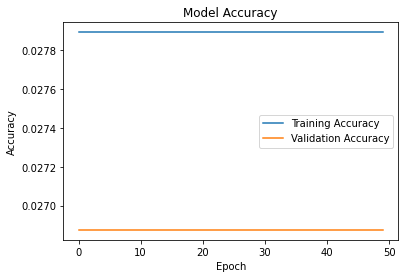

In [27]:
# Plot the accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [28]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 2.43%


In [29]:
# Initialize the classifiers
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
svm_classifier = SVC(kernel='linear', probability=True, random_state=42)

In [30]:
# Create the ensemble model using VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('rf', rf_classifier),
    ('svm', svm_classifier)
], voting='soft')

In [31]:
# Train the ensemble model with a subset of the training data to reduce time complexity
subset_size = int(0.1 * len(X_train))  # Use 10% of the training data
X_train_subset = X_train[:subset_size]
y_train_subset = y_train[:subset_size]

ensemble_model.fit(X_train_subset, y_train_subset)

# Make predictions
y_pred_ensemble = ensemble_model.predict(X_test)

In [32]:
# Evaluate the model
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(f"Accuracy of Ensemble model: {accuracy_ensemble * 100:.2f}%")

Accuracy of Ensemble model: 3.60%


In [35]:
# Create a dummy dataset
dummy_data = {
    'Acedamic percentage in Operating Systems': np.random.randint(50, 100, 100),
    'percentage in Algorithms': np.random.randint(50, 100, 100),
    'Percentage in Programming Concepts': np.random.randint(50, 100, 100),
    'Percentage in Software Engineering': np.random.randint(50, 100, 100),
    'Percentage in Computer Networks': np.random.randint(50, 100, 100),
    'Percentage in Electronics Subjects': np.random.randint(50, 100, 100),
    'Percentage in Computer Architecture': np.random.randint(50, 100, 100),
    'Percentage in Mathematics': np.random.randint(50, 100, 100),
    'Percentage in Communication skills': np.random.randint(50, 100, 100),
    'Hours working per day': np.random.randint(1, 12, 100),
    'Logical quotient rating': np.random.randint(1, 10, 100),
    'hackathons': np.random.randint(0, 5, 100),
    'coding skills rating': np.random.randint(1, 10, 100),
    'public speaking points': np.random.randint(1, 10, 100),
    'can work long time before system?': np.random.randint(0, 2, 100),
    'self-learning capability?': np.random.randint(0, 2, 100),
    'Extra-courses did': np.random.randint(0, 2, 100),
    'talenttests taken?': np.random.randint(0, 2, 100),
    'olympiads': np.random.randint(0, 2, 100),
    'reading and writing skills': np.random.randint(0, 3, 100),
    'memory capability score': np.random.randint(0, 3, 100),
    'interested career area': np.random.choice(['system developer', 'Business process analyst', 'developer', 'testing'], 100),
    'Job/Higher Studies?': np.random.randint(0, 2, 100),
    'Taken inputs from seniors or elders': np.random.randint(0, 2, 100),
    'interested in games': np.random.randint(0, 2, 100),
    'Salary Range Expected': np.random.randint(0, 2, 100),
    'In a Realtionship?': np.random.randint(0, 2, 100),
    'Gentle or Tuff behaviour?': np.random.randint(0, 2, 100),
    'Management or Technical': np.random.randint(0, 2, 100),
    'Salary/work': np.random.randint(0, 2, 100),
    'hard/smart worker': np.random.randint(0, 2, 100),
    'worked in teams ever?': np.random.randint(0, 2, 100),
    'Introvert': np.random.randint(0, 2, 100),
    'certifications_app development': np.random.randint(0, 2, 100),
    'certifications_distro making': np.random.randint(0, 2, 100),
    'certifications_full stack': np.random.randint(0, 2, 100),
    'certifications_hadoop': np.random.randint(0, 2, 100),
    'certifications_information security': np.random.randint(0, 2, 100),
    'certifications_machine learning': np.random.randint(0, 2, 100),
    'certifications_python': np.random.randint(0, 2, 100),
    'certifications_r programming': np.random.randint(0, 2, 100),
    'certifications_shell programming': np.random.randint(0, 2, 100),
    'workshops_cloud computing': np.random.randint(0, 2, 100),
    'workshops_data science': np.random.randint(0, 2, 100),
    'workshops_database security': np.random.randint(0, 2, 100),
    'workshops_game development': np.random.randint(0, 2, 100),
    'workshops_hacking': np.random.randint(0, 2, 100),
    'workshops_system designing': np.random.randint(0, 2, 100),
    'workshops_testing': np.random.randint(0, 2, 100),
    'workshops_web technologies': np.random.randint(0, 2, 100),
    'Interested subjects_IOT': np.random.randint(0, 2, 100),
    'Interested subjects_Management': np.random.randint(0, 2, 100),
    'Interested subjects_Software Engineering': np.random.randint(0, 2, 100),
    'Interested subjects_cloud computing': np.random.randint(0, 2, 100),
    'Interested subjects_data engineering': np.random.randint(0, 2, 100),
    'Interested subjects_hacking': np.random.randint(0, 2, 100),
    'Interested subjects_networks': np.random.randint(0, 2, 100),
    'Interested subjects_parallel computing': np.random.randint(0, 2, 100),
    'Interested subjects_programming': np.random.randint(0, 2, 100),
    'Type of company want to settle in?_BPA': np.random.randint(0, 2, 100),
    'Type of company want to settle in?_Cloud Services': np.random.randint(0, 2, 100),
    'Type of company want to settle in?_Finance': np.random.randint(0, 2, 100),
    'Type of company want to settle in?_Product based': np.random.randint(0, 2, 100),
    'Type of company want to settle in?_SAaS services': np.random.randint(0, 2, 100),
    'Type of company want to settle in?_Sales and Marketing': np.random.randint(0, 2, 100),
    'Type of company want to settle in?_Service Based': np.random.randint(0, 2, 100),
    'Type of company want to settle in?_Testing and Maintainance Services': np.random.randint(0, 2, 100),
    'Type of company want to settle in?_Web Services': np.random.randint(0, 2, 100),
    'Type of company want to settle in?_product development': np.random.randint(0, 2, 100),
    'Interested Type of Books_Action and Adventure': np.random.randint(0, 2, 100),
    'Interested Type of Books_Anthology': np.random.randint(0, 2, 100),
    'Interested Type of Books_Art': np.random.randint(0, 2, 100),
    'Interested Type of Books_Autobiographies': np.random.randint(0, 2, 100),
    'Interested Type of Books_Biographies': np.random.randint(0, 2, 100),
    'Interested Type of Books_Childrens': np.random.randint(0, 2, 100),
    'Interested Type of Books_Comics': np.random.randint(0, 2, 100),
    'Interested Type of Books_Cookbooks': np.random.randint(0, 2, 100),
    'Interested Type of Books_Diaries': np.random.randint(0, 2, 100),
    'Interested Type of Books_Dictionaries': np.random.randint(0, 2, 100),
    'Interested Type of Books_Drama': np.random.randint(0, 2, 100),
    'Interested Type of Books_Encyclopedias': np.random.randint(0, 2, 100),
    'Interested Type of Books_Fantasy': np.random.randint(0, 2, 100),
    'Interested Type of Books_Guide': np.random.randint(0, 2, 100),
    'Interested Type of Books_Health': np.random.randint(0, 2, 100),
    'Interested Type of Books_History': np.random.randint(0, 2, 100),
    'Interested Type of Books_Horror': np.random.randint(0, 2, 100),
    'Interested Type of Books_Journals': np.random.randint(0, 2, 100),
    'Interested Type of Books_Math': np.random.randint(0, 2, 100),
    'Interested Type of Books_Mystery': np.random.randint(0, 2, 100),
    'Interested Type of Books_Poetry': np.random.randint(0, 2, 100),
    'Interested Type of Books_Prayer books': np.random.randint(0, 2, 100),
    'Interested Type of Books_Religion-Spirituality': np.random.randint(0, 2, 100),
    'Interested Type of Books_Romance': np.random.randint(0, 2, 100),
    'Interested Type of Books_Satire': np.random.randint(0, 2, 100),
    'Interested Type of Books_Science': np.random.randint(0, 2, 100),
    'Interested Type of Books_Science fiction': np.random.randint(0, 2, 100),
    'Interested Type of Books_Self help': np.random.randint(0, 2, 100),
    'Interested Type of Books_Series': np.random.randint(0, 2, 100),
    'Interested Type of Books_Travel': np.random.randint(0, 2, 100),
    'Interested Type of Books_Trilogy': np.random.randint(0, 2, 100)
}

# Convert the dictionary to a DataFrame
dummy_df = pd.DataFrame(dummy_data)

# Display the first few rows of the dummy dataset
dummy_df.head()

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,...,Interested Type of Books_Prayer books,Interested Type of Books_Religion-Spirituality,Interested Type of Books_Romance,Interested Type of Books_Satire,Interested Type of Books_Science,Interested Type of Books_Science fiction,Interested Type of Books_Self help,Interested Type of Books_Series,Interested Type of Books_Travel,Interested Type of Books_Trilogy
0,69,97,54,85,53,92,93,69,80,9,...,0,0,0,0,0,0,0,1,0,0
1,72,50,76,96,77,63,93,76,99,1,...,1,0,0,1,0,1,1,0,1,1
2,53,55,96,64,92,93,84,80,79,8,...,1,1,0,1,1,1,1,1,1,1
3,82,76,97,53,87,62,98,63,55,7,...,1,1,0,0,0,1,0,0,0,1
4,99,68,64,53,57,78,95,76,60,11,...,1,0,0,0,0,1,0,1,0,1
